In [166]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pickle

cifar10_dataset_folder_path = 'cifar-10-batches-py'

In [167]:
n_batches = 5 #data_batch_1
batch_id = 5
file = {}
# load training dataset batchwise
# for batch_i in range(batch_id):
training_batch1 = open(cifar10_dataset_folder_path + '/data_batch_1', mode='rb')
batch = pickle.load(training_batch1, encoding='latin1')
f1 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
l1 = np.array(batch['labels'])

training_batch1 = open(cifar10_dataset_folder_path + '/data_batch_2', mode='rb')
batch = pickle.load(training_batch1, encoding='latin1')
f2 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
l2 = np.array(batch['labels'])

training_batch1 = open(cifar10_dataset_folder_path + '/data_batch_3', mode='rb')
batch = pickle.load(training_batch1, encoding='latin1')
f3 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
l3 = np.array(batch['labels'])

training_batch1 = open(cifar10_dataset_folder_path + '/data_batch_4', mode='rb')
batch = pickle.load(training_batch1, encoding='latin1')
f4 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
l4 = np.array(batch['labels'])

training_batch1 = open(cifar10_dataset_folder_path + '/data_batch_5', mode='rb')
batch = pickle.load(training_batch1, encoding='latin1')
f5 = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
l5 = np.array(batch['labels'])

x_train = np.concatenate([f1, f2, f3, f4, f5], axis=0)
y_train = np.concatenate([l1, l2, l3, l4, l5], axis=0)

# test data
test_batch = open(cifar10_dataset_folder_path + '/test_batch', mode='rb')
batch = pickle.load(test_batch, encoding='latin1')
x_test = np.array(batch['data']).reshape((len(batch['data']), 32, 32, 3))
y_test = np.array(batch['labels'])

In [168]:
# Determine shape of the data
input_shape = (32, 32, 3)

# Parse numbers as floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [181]:
# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(10, activation='softmax'))

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000228B2AA1088>>

In [188]:
# coefficients of first 5 filters in 1st and 2nd convolutional layers
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

In [147]:
batch_size = 64
loss_function = sparse_categorical_crossentropy
epochs = 30
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split=0.2)

# Generate generalization metrics
batch = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {batch[0]}, Classification accuracy on the test set: {batch[1]}')

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 103s 3ms/sample - loss: 1.9031 - accuracy: 0.3049 - val_loss: 1.6707 - val_accuracy: 0.3991
Epoch 2/5
40000/40000 [==============================] - 137s 3ms/sample - loss: 1.6281 - accuracy: 0.4136 - val_loss: 1.5730 - val_accuracy: 0.4330
Epoch 3/5
40000/40000 [==============================] - 124s 3ms/sample - loss: 1.5356 - accuracy: 0.4512 - val_loss: 1.4722 - val_accuracy: 0.4731
Epoch 4/5
40000/40000 [==============================] - 135s 3ms/sample - loss: 1.4654 - accuracy: 0.4777 - val_loss: 1.4160 - val_accuracy: 0.4975
Epoch 5/5
40000/40000 [==============================] - 125s 3ms/sample - loss: 1.4164 - accuracy: 0.4971 - val_loss: 1.3742 - val_accuracy: 0.5164
Test loss: 1.3565473161697388, Classification accuracy on the test set: 0.5184999704360962


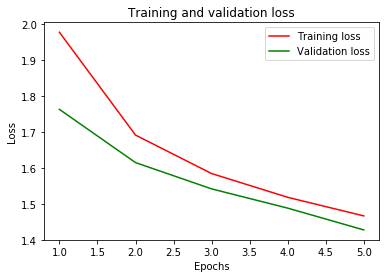

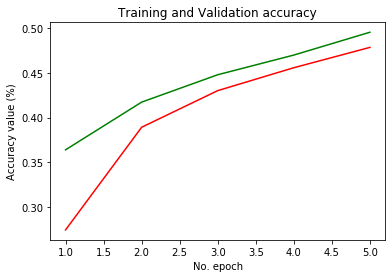

IndexError: list index out of range

In [157]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot history: Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='green', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

GRAYSCALE

In [158]:
# RGB to grayscale code conversion
def grayscale(data, dtype = 'float32'):
    r,g,b = np.asarray(.3 , dtype = dtype),np.asarray(.59 , dtype = dtype),np.asarray(.11 , dtype = dtype)
    rst = r * data[:,:,:,0] + g * data[:,:,:,1] + b * data[:,:,:,2]
    rst = np.expand_dims(rst, axis = 3)
    return rst

x_train_gray=grayscale(x_train)
x_test_gray=grayscale(x_test)

In [159]:
gray_input_shape = (32, 32, 1)
# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape = gray_input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [164]:
batch_size = 64
loss_function = sparse_categorical_crossentropy
epochs = 30
optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(x_train_gray, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_split=0.2)

# Generate generalization metrics
batch = model.evaluate(x_test_gray, y_test, verbose=0)
print('Test loss: {batch[0]} / Test accuracy: {batch[1]}')

Train on 40000 samples, validate on 10000 samples
40000/40000 [==============================] - 86s 2ms/sample - loss: 1.4212 - accuracy: 0.4943 - val_loss: 1.3851 - val_accuracy: 0.5058
Test loss: 1.3652864730834962 / Test accuracy: 0.5148000121116638


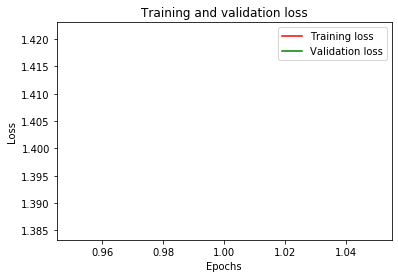

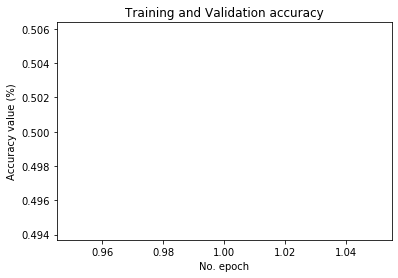

In [165]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot history: Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy, color='green', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()